<a href="https://colab.research.google.com/github/Simonobez/Pina-Indian-Women-Diabetes-Analysis/blob/main/Capstone_Project_1_Data_Cleaning_%26_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #needed for heatmaps
import seaborn as sns #needed for seaborn scatterplot
from statistics import mean #needed for calculations
import plotly.express as px #needed for plotly scatterplot
import plotly.graph_objects as go #needed for plotly scatterplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
# Read the csv file
df = pd.read_csv('diabetes.csv')


In [ ]:
# Display the first 5 rows
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Check for missing values in the dataframe and display the count in ascending order
missing_values = df.isnull().sum().sort_values(ascending=True)
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Look for duplicates
df.duplicated().sum()

0

In [ ]:
# display the total number of records in the dataframe after removing the duplicates
df.drop_duplicates(inplace=True)
df.shape

(768, 9)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
outcome = df['Outcome']
diabetes_data = df[outcome == 1]
nodiabetes_data = df[outcome == 0]
diabetes_data
#nodiabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
# Compare the ages with diabetes and without diabetes
df.groupby('Outcome')['Age'].mean()

,Age
Outcome,
0,31.190000
1,37.067164


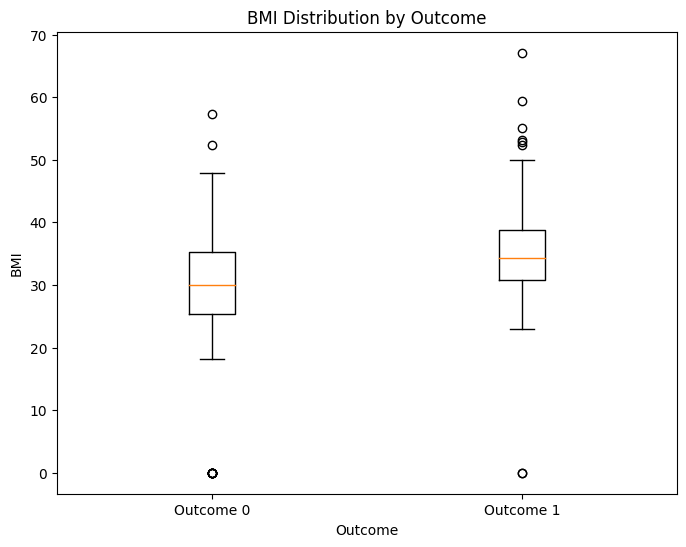

In [ ]:
# @title BMI Distribution by Outcome

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(8, 6))

plt.boxplot([df[df['Outcome'] == 0]['BMI'], df[df['Outcome'] == 1]['BMI']], labels=['Outcome 0', 'Outcome 1'])

plt.xlabel('Outcome')
plt.ylabel('BMI')
_ = plt.title('BMI Distribution by Outcome')

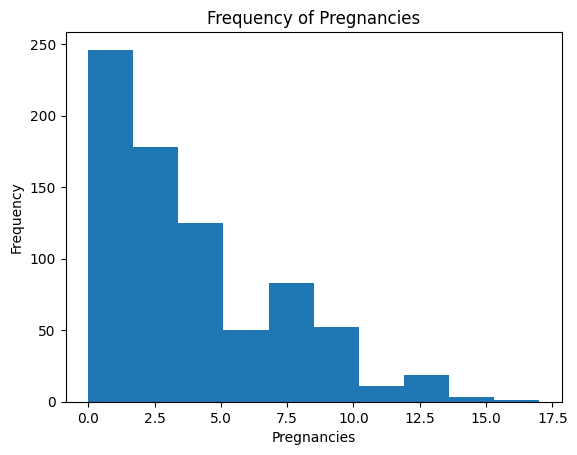

In [ ]:
# Create a histogram to show frequency of pregnancies
plt.hist(df['Pregnancies'])
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Frequency of Pregnancies')
plt.show()

In [ ]:
# prompt: Using dataframe df: scatter

import altair as alt

# Create a scatter plot of Glucose vs. BMI, colored by Outcome
alt.Chart(df).mark_circle().encode(
    x='Glucose',
    y='BMI',
    color='Outcome'
)


alt.Chart(...)